315456
424
['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']
['1101053', 11110530, '서울', '종로구', '사직동']
핫플레이스가 위치한 행정동을 입력하세요. -->압구정동
압구정동 - 11680545을(를) 분석합니다!
[37098.63627419355, 35891.815432258074, 34893.24598064515, 34239.072461290314, 33920.37237419355, 34494.50137741935, 35905.50056774193, 38626.92853870967, 44979.65409354841, 51633.661274193546, 55554.117774193546, 58916.34707096774, 61492.38014516128, 63030.782135483874, 63344.8899387097, 63202.48352903225, 62733.28691935485, 62500.427067741955, 60220.48321290324, 55475.18018064517, 51779.897145161296, 48206.21305483869, 43570.433745161296, 39358.195206451615]


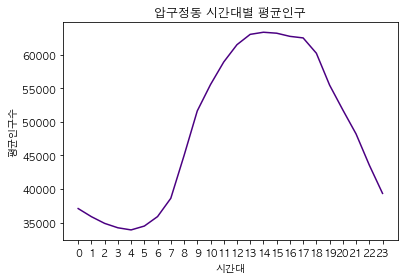

In [38]:
import csv
import matplotlib.pyplot as plt

f = open('LOCAL_PEOPLE_DONG_201912.csv') #encoding 굳이 안해줘도 알아서 해줌
data = csv.reader(f)
next(data)
data = list(data)
print(len(data))

f2 = open('dong_code.csv')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)
print(len(code_data))

for row in data:
    for i in range(1,32): #index가 2이하면 정수형 나머진 실수형 변환
        if i<= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
print(data[0])

for row in code_data:
    row[1] = int(row[1])
print(code_data[0])

dong_name = input('핫플레이스가 위치한 행정동을 입력하세요. -->')
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]
print('{} - {}을(를) 분석합니다!'.format(dong_name, dong_code))

#한달 간 시간대별 총생활 인구수의 합
population = [0 for i in range(24)] # 길이 24인 리스트의 초기값을 0으로 초기화
for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        population[time] += p

#하루간 시간대별 생활 인구수
population = [p/31 for p in population]
print(population)

plt.rc('font',family='AppleGothic')
plt.title('{} 시간대별 평균인구'.format(dong_name))
plt.plot(range(24), population, color='indigo')
plt.xticks(range(24)) #x축 눈금
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

핫플레이스가 위치한 행정동을 입력하세요. -->압구정동
압구정동 - 11680545을(를) 분석합니다!
2019년 12월의 주중 일수 = 22 주말 일수 = 9
주중 인구: [36348.0879, 35284.529854545464, 34498.768759090904, 34028.96384545454, 33899.33714545454, 34599.74798636365, 36262.84079090908, 39520.43202272727, 47412.64013636365, 54707.293981818184, 58675.10905, 61947.59178181819, 64325.155981818185, 65856.20964545454, 66227.48544545454, 66413.45866818182, 66251.15107727272, 66640.75652727274, 64521.26677272727, 58771.3062409091, 54535.62893636364, 50508.405322727274, 45000.37916363635, 40292.146422727266]
주말 인구: [38933.31007777777, 37376.29128888888, 35857.52363333333, 34752.6713, 33971.79182222223, 34237.23188888889, 35032.00224444444, 36442.80891111111, 39032.354877777776, 44120.33687777778, 47925.02798888888, 51506.637777777774, 54567.81698888889, 56124.18155555555, 56298.54536666667, 55353.43318888889, 54134.06342222222, 52379.621722222226, 49707.45673333333, 47417.98314444444, 45043.66387777778, 42578.63195555555, 40075.01161111111, 37075.2033444

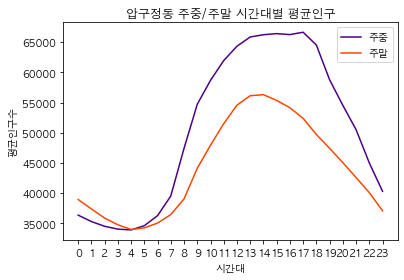

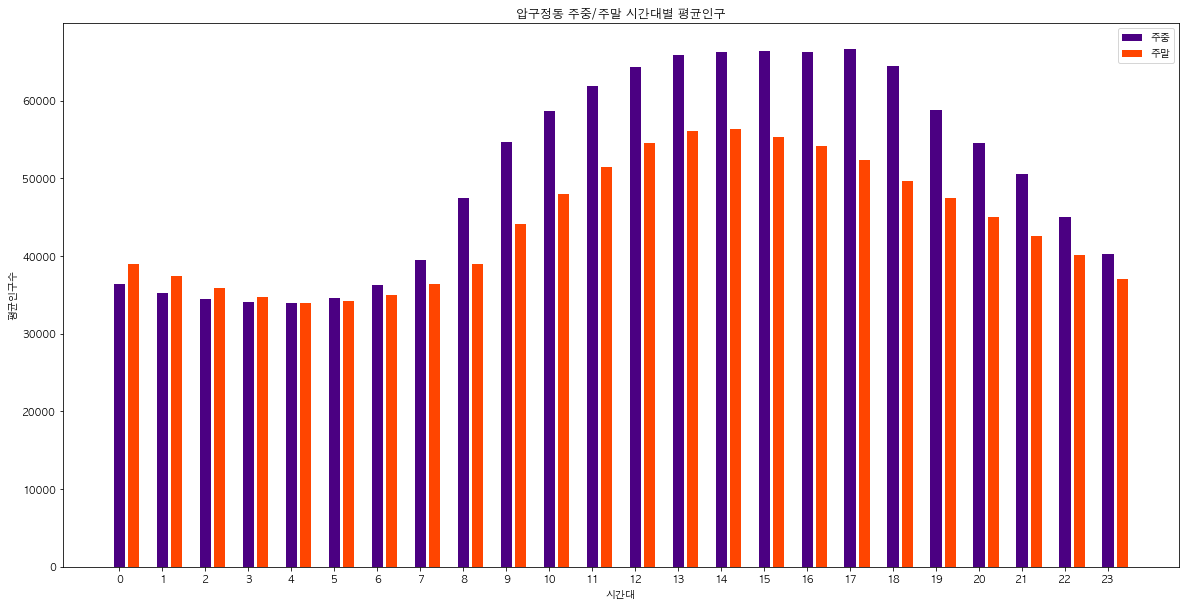

In [50]:
import datetime
import csv
import matplotlib.pyplot as plt

f = open('LOCAL_PEOPLE_DONG_201912.csv') #encoding 굳이 안해줘도 알아서 해줌
data = csv.reader(f)
next(data)
data = list(data)

f2 = open('dong_code.csv')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

for row in data:
    for i in range(1,32): #index가 2이하면 정수형 나머진 실수형 변환
        if i<= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])

for row in code_data:
    row[1] = int(row[1])

dong_name = input('핫플레이스가 위치한 행정동을 입력하세요. -->')
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]
print('{} - {}을(를) 분석합니다!'.format(dong_name, dong_code))

weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
        num = datetime.date(year, mon, day).weekday()
        if num < 5:
            weekday[time] += p
        else:
            weekend[time] += p

weekday_cnt, weekend_cnt = 0, 0
for i in range(1,32):
    if datetime.date(2019,12,i).weekday() < 5:
        weekday_cnt += 1
    else:
        weekend_cnt += 1
print('2019년 12월의 주중 일수 = {} 주말 일수 = {}'.format(weekday_cnt, weekend_cnt))
weekday = [w/weekday_cnt for w in weekday]
weekend= [w/weekend_cnt for w in weekend]

print('주중 인구: {}'.format(weekday))
print('주말 인구: {}'.format(weekend))

plt.rc('font',family='AppleGothic')
plt.title('{} 주중/주말 시간대별 평균인구'.format(dong_name))
plt.plot(weekday, color='indigo', label='주중')
plt.plot(weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24))
plt.show()

plt.figure(figsize=(20,10)) #그래프 사이즈 조정
plt.rc('font',family='AppleGothic')
plt.title('{} 주중/주말 시간대별 평균인구'.format(dong_name))
plt.bar(range(0,72,3), weekday, color='indigo', label='주중')
plt.bar(range(1,73,3), weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(0,72,3), range(24)) #ticks의 첫번째 요소는 간격이고 두번째 요소는 명칭을 뜻함
plt.show()

핫플레이스가 위치한 행정동을 입력하세요. -->압구정동
압구정동 - 11680545을(를) 분석합니다!


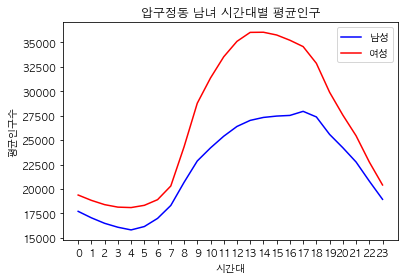

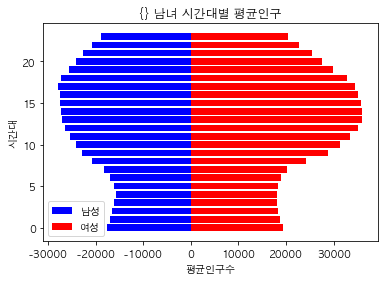

In [57]:
import csv
import matplotlib
import matplotlib.pyplot as plt

f = open('LOCAL_PEOPLE_DONG_201912.csv') #encoding 굳이 안해줘도 알아서 해줌
data = csv.reader(f)
next(data)
data = list(data)

f2 = open('dong_code.csv')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

for row in data:
    for i in range(1,32): #index가 2이하면 정수형 나머진 실수형 변환
        if i<= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])

for row in code_data:
    row[1] = int(row[1])

dong_name = input('핫플레이스가 위치한 행정동을 입력하세요. -->')
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]
print('{} - {}을(를) 분석합니다!'.format(dong_name, dong_code))

male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time = row[1]
        male[time] += sum(row[4:18])
        female[time] += sum(row[18:32])
male = [m/31 for m in male]
female = [f/31 for f in female]

plt.rc('font', family='AppleGothic')
plt.title('{} 남녀 시간대별 평균인구'.format(dong_name))
plt.plot(male, color='b', label='남성')
plt.plot(female, color='r', label='여성')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24))
plt.show()

male = [-m for m in male]
matplotlib.rcParams['axes.unicode_minus'] = False

plt.rc('font',family='AppleGothic')
plt.title('{} 남녀 시간대별 평균인구')
plt.barh(range(24), male, color='b', label='남성')
plt.barh(range(24), female, color='r', label='여성')
plt.legend()
plt.xlabel('평균인구수')
plt.ylabel('시간대')
plt.show()

핫플레이스가 위치한 행정동을 입력하세요. -->압구정동
비교할 행정동을 입력하세요, -->역삼2동


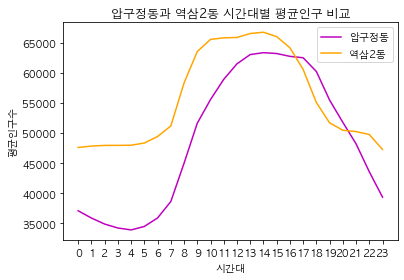

In [61]:
import csv
import matplotlib
import matplotlib.pyplot as plt

f = open('LOCAL_PEOPLE_DONG_201912.csv') #encoding 굳이 안해줘도 알아서 해줌
data = csv.reader(f)
next(data)
data = list(data)

f2 = open('dong_code.csv')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

for row in data:
    for i in range(1,32): #index가 2이하면 정수형 나머진 실수형 변환
        if i<= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])

for row in code_data:
    row[1] = int(row[1])

dong_name = input('핫플레이스가 위치한 행정동을 입력하세요. -->')
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]

dong_name2 = input('비교할 행정동을 입력하세요, -->')
for row in code_data:
    if row[-1] == dong_name2:
        dong_code2 = row[1]
        
population = [0 for i in range(24)]
population2 = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        population[time] += p
    elif row[2] == dong_code2:
        time, p = row[1], row[3]
        population2[time] += p
population = [p/31 for p in population]
population2 = [p/31 for p in population2]

plt.rc('font', family='AppleGothic')
plt.title('{}과 {} 시간대별 평균인구 비교'.format(dong_name, dong_name2))
plt.plot(population, color='m', label=dong_name)
plt.plot(population2, color='orange', label=dong_name2)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24))
plt.show()

In [ ]:
_